# Position of a quasar

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from scipy.stats import norm

## Part 1: homoscedastic

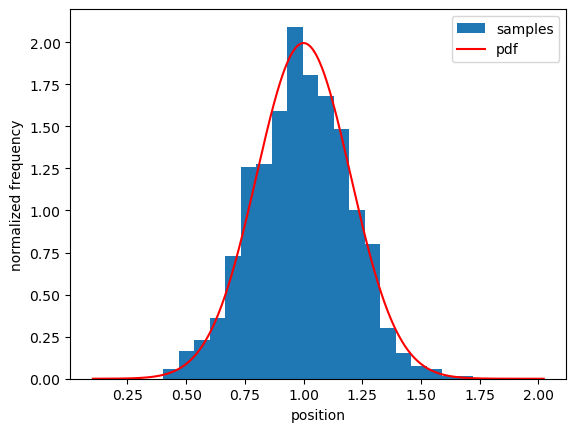

In [23]:
mean = 1
Sigma = 0.2   
N = 1000

data = norm(mean, Sigma).rvs(N)    # N samples from gaussian distribution

xgrid = np.linspace(min(data)-0.3, max(data)+0.3, 1000)
plt.hist(data, 20, density=True, label='samples')
plt.plot(xgrid, norm(mean, Sigma).pdf(xgrid), c='r', label='pdf')
plt.xlabel('position')
plt.ylabel('normalized frequency')
plt.legend()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 411.40it/s]


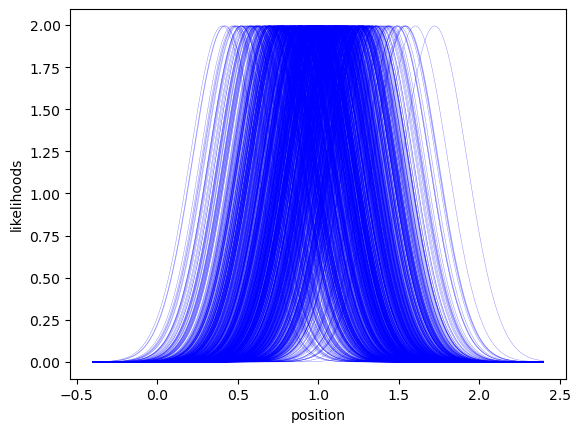

In [24]:
x = np.linspace(mean-7*Sigma, mean+7*Sigma, 10000)     # x grid
likelihoods = np.zeros((N,len(x)))

for i in tqdm(range(N)):
    likelihoods[i] = norm(data[i], Sigma).pdf(x)

for i in range(N):
    plt.plot(x,likelihoods[i], color='b',linewidth=0.3, alpha=0.5)       #plot all the likelihoods for each measurement
plt.xlabel('position')
plt.ylabel('likelihoods')
plt.show()

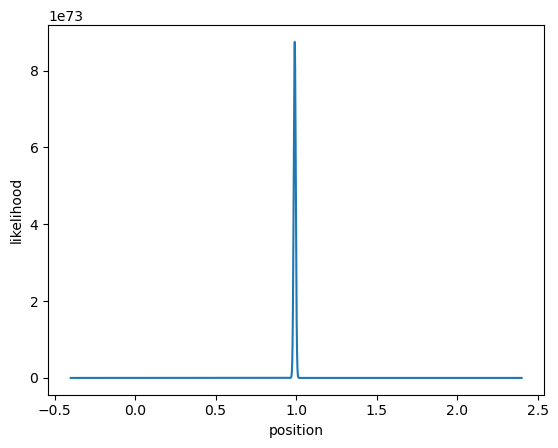

In [25]:
L = np.ones(len(x))           
for j in range(len(x)):
    for i in range(N):
        L[j] = L[j]*likelihoods[i][j]      # likelihood as product of single likelihoods
plt.plot(x,L)
plt.xlabel('position')
plt.ylabel('likelihood')
plt.show()

In [26]:
a = np.argsort(L)
MLEe = x[a[-1]]       # maximum of the likelihood 
MLEe

0.9911791179117915

### $\mu=\frac{1}{N}\sum x_i$

In [27]:
MLEt = np.mean(data)   # MLE derived from the formula of likelihood maximization
print(MLEt)

0.991221064390757


 Theoretical MLE: 0.991221064390757 
Experimental MLE: 0.9911791179117915


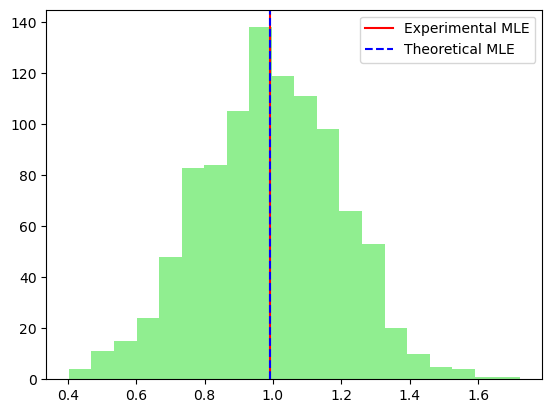

In [28]:
# comparison between the 2 MLEs
print(" Theoretical MLE:",MLEt,"\nExperimental MLE:",MLEe)
plt.hist(data,20,color='lightgreen',)
plt.axvline(MLEe,color='r',label='Experimental MLE')
plt.axvline(MLEt,color='b',ls='dashed',label='Theoretical MLE')
plt.legend()
plt.show()

## Part 2: Fisher matrix

In [29]:
F_err_t = Sigma/np.sqrt(N)        # theoretical Fisher matrix error (for gaussian distrib)

lnL = np.log(L)           # log of the likelihood
diff2_L = - np.diff(lnL,n=2)/((x[5]-x[4])**2)    # 2nd order differentiation of logL 
Fisher = diff2_L[a[-1]]        # Fisher matrix (second derivative of logL evaluated in the maximum)
F_err_e = Fisher**(-1/2)     # uncertainty 

print(" Theoretical Fisher matrix error:", F_err_t,"\nExperimental Fisher matrix error:",F_err_e)

 Theoretical Fisher matrix error: 0.006324555320336759 
Experimental Fisher matrix error: 0.006324555320341249


/tmp/ipykernel_441/3741923703.py:3: RuntimeWarning: divide by zero encountered in log
  lnL = np.log(L)           # log of the likelihood
/home/sandokan/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


μ = 0.9911791179117915 ± 0.006324555320341249


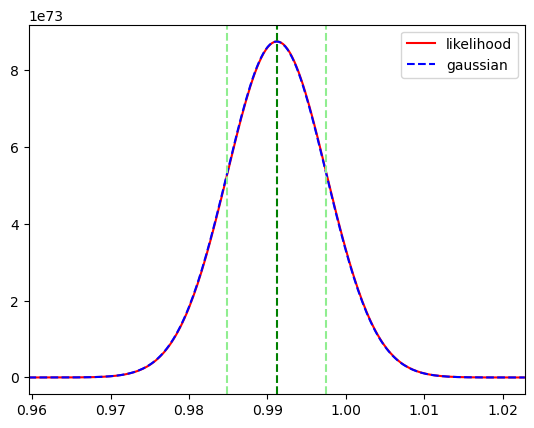

In [30]:
print('μ =',MLEe,'±',F_err_e)

gaussL = norm(MLEe,F_err_e).pdf(x)     # N(μ,σ_μ)

# plot
plt.plot(x, L, color='r',label='likelihood')                                         # likelihood
plt.plot(x, gaussL*max(L)/max(gaussL), color='b',linestyle='--',label='gaussian')    # normalized gaussian

plt.xlim(MLEe-5*F_err_e, MLEe+5*F_err_e)
plt.axvline(MLEe, color='g',linestyle='--')
plt.axvline(MLEe+F_err_e, color='lightgreen',linestyle='--')
plt.axvline(MLEe-F_err_e, color='lightgreen',linestyle='--')
plt.legend()
plt.show()

## Part 3: heteroscedastic

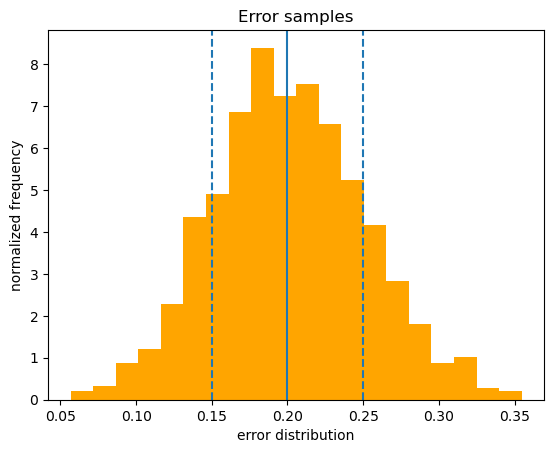

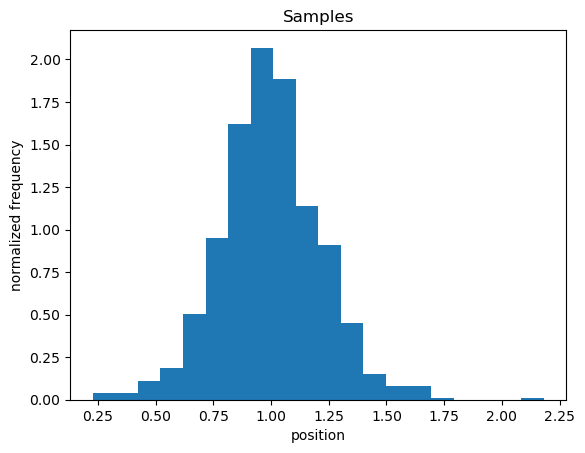

In [10]:
mean = 1
N = 1000
Sigma = norm(0.2, 0.05).rvs(N)   

plt.hist(Sigma,20,color='orange',density=True)
plt.axvline(0.2)
plt.axvline(0.2+0.05,linestyle='--')
plt.axvline(0.2-0.05,linestyle='--')
plt.xlabel('error distribution')
plt.ylabel('normalized frequency')  
plt.title('Error samples')
plt.show()

#------------------------------

data = []
for sigma in Sigma:
    data.append(norm(mean,sigma).rvs(1)[0])    # N samples from gaussian distributions N(1, Sigma)
data = np.array(data)

plt.hist(data, 20, density=True, label='samples')
plt.xlabel('position')
plt.ylabel('normalized frequency')
plt.title('Samples')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 450.35it/s]


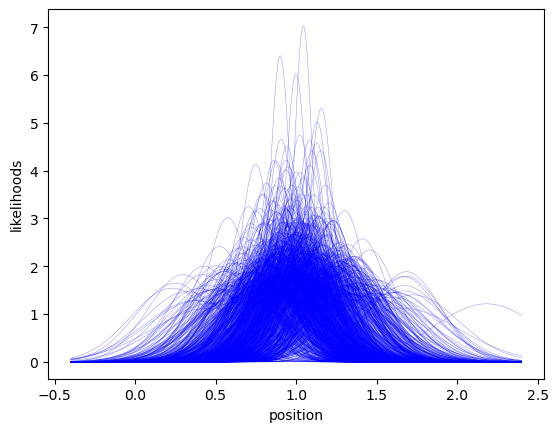

In [11]:
x = np.linspace(mean-7*0.2, mean+7*0.2, 10000)     # x grid
likelihoods = np.zeros((N,len(x)))

for i in tqdm(range(N)):
    likelihoods[i] = norm(data[i], Sigma[i]).pdf(x)

for i in range(N):
    plt.plot(x,likelihoods[i], color='b',linewidth=0.3, alpha=0.5)       #plot all the likelihoods for each measurement
plt.xlabel('position')
plt.ylabel('likelihoods')
plt.show()

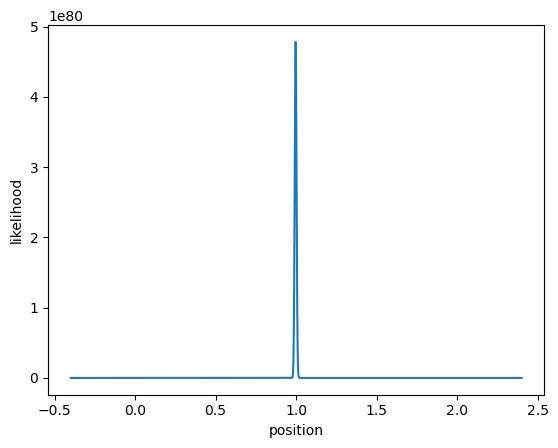

In [12]:
L = np.ones(len(x))           
for j in range(len(x)):
    for i in range(N):
        L[j] = L[j]*likelihoods[i][j]      # likelihood as product of single likelihoods
plt.plot(x,L)
plt.xlabel('position')
plt.ylabel('likelihood')
plt.show()

In [13]:
a = np.argsort(L)
MLEe = x[a[-1]]       # maximum of the likelihood 
MLEe

0.9967796779677971

### $\mu=\frac{\sum x_i/\sigma_i^2}{\sum 1/\sigma_i^2}$

In [14]:
MLEt = np.sum(data/Sigma**2)/np.sum(1/Sigma**2)    # MLE derived from the measurements
print(MLEt)

0.9967667168669998


 Theoretical MLE: 0.9967667168669998 
Experimental MLE: 0.9967796779677971


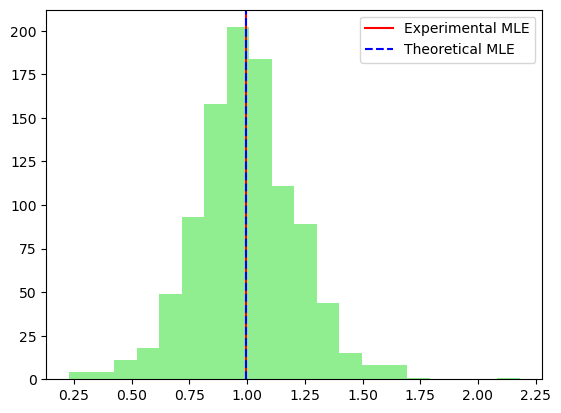

In [15]:
# comparison between the 2 MLEs
print(" Theoretical MLE:",MLEt,"\nExperimental MLE:",MLEe)
plt.hist(data,20,color='lightgreen',)
plt.axvline(MLEe,color='r',label='Experimental MLE')
plt.axvline(MLEt,color='b',ls='dashed',label='Theoretical MLE')
plt.legend()
plt.show()

In [16]:
F_err_t = np.sum(1/Sigma**2)**(-1/2)        # theoretical Fisher matrix error (for gaussian distrib)

lnL = np.log(L[L>0])           # log of the likelihood
diff2_L = - np.diff(lnL,n=2)/((x[5]-x[4])**2)    # 2nd order differentiation of logL 
Fisher = diff2_L[np.argsort(lnL)[-1]]        # Fisher matrix (second derivative of logL evaluated in the maximum)
F_err_e = Fisher**(-1/2)     # uncertainty 

print(" Theoretical Fisher matrix error:", F_err_t,"\nExperimental Fisher matrix error:",F_err_e)

 Theoretical Fisher matrix error: 0.005666023859072678 
Experimental Fisher matrix error: 0.005666023859090361


μ = 0.9967796779677971 ± 0.005666023859090361


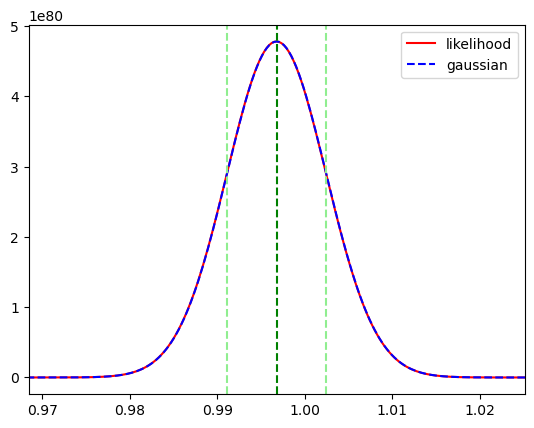

In [17]:
print('μ =',MLEe,'±',F_err_e)

gaussL = norm(MLEe,F_err_e).pdf(x)     # N(μ,σ_μ)

# plot
plt.plot(x, L, color='r',label='likelihood')                                         # likelihood
plt.plot(x, gaussL*max(L)/max(gaussL), color='b',linestyle='--',label='gaussian')    # normalized gaussian

plt.xlim(MLEe-5*F_err_e, MLEe+5*F_err_e)
plt.axvline(MLEe, color='g',linestyle='--')
plt.axvline(MLEe+F_err_e, color='lightgreen',linestyle='--')
plt.axvline(MLEe-F_err_e, color='lightgreen',linestyle='--')
plt.legend()
plt.show()